In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 10

w1 = np.random.rand(n,n)
b1 = np.random.rand(n,1)

In [3]:
t = np.linspace(0,1,n).reshape(-1,1)


In [4]:
def modelo(x):
    return w1@x + b1

In [5]:
modelo(t)

array([[2.55754175],
       [3.46810671],
       [3.0567904 ],
       [2.24344271],
       [4.1759201 ],
       [1.71043261],
       [3.43420835],
       [3.24414578],
       [3.30603882],
       [2.67730589]])

In [6]:
def real_function(x):
    return 3*x + 2

In [7]:
real_function(t)

array([[2.        ],
       [2.33333333],
       [2.66666667],
       [3.        ],
       [3.33333333],
       [3.66666667],
       [4.        ],
       [4.33333333],
       [4.66666667],
       [5.        ]])

In [8]:
def loss(x):
    return np.mean(np.square(modelo(x)-real_function(x)))

In [9]:
def loss_derivate(x):
    return 2/n *(modelo(x)- real_function(x))

In [10]:
loss_derivate(t)

array([[ 0.11150835],
       [ 0.22695468],
       [ 0.07802475],
       [-0.15131146],
       [ 0.16851735],
       [-0.39124681],
       [-0.11315833],
       [-0.21783751],
       [-0.27212557],
       [-0.46453882]])

In [11]:
def gradiente(x,w1,b1):
    
    dw1 = loss_derivate(x) @ x.T
    db1 = loss_derivate(x)
    return dw1, db1

In [12]:
x = np.linspace(0,10,n)
gradiente(x,w1,b1)[0]

array([ 7.81142857, 10.87131451, 14.08996795,  9.13954898, 13.09973593,
        5.68980984, 13.24489191, 11.94801632, 14.66977666, 10.30087684])

In [13]:
x = np.linspace(0,10,n).reshape(n,1)
y = modelo(x)
y_hat = real_function(x)

Epochs = 15000
lr = 0.001
loss_array = np.zeros(Epochs)

for i in range(Epochs):
    g = gradiente(x,w1,b1)
    dw1 = g[0]
    db1 = g[1]
    
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    
    loss_array[i] = loss(x)
    if i%50 == 0:
        print("Epoch: " , i, " Loss: ", loss_array[i])
    
    
    
    
    
    



Epoch:  0  Loss:  153.9328195222063
Epoch:  50  Loss:  0.10208984959131358
Epoch:  100  Loss:  6.770705182901647e-05
Epoch:  150  Loss:  4.4904022150584574e-08
Epoch:  200  Loss:  2.978081530526052e-11
Epoch:  250  Loss:  1.9750947038105185e-14
Epoch:  300  Loss:  1.3099033178727652e-17
Epoch:  350  Loss:  8.687440901808646e-21
Epoch:  400  Loss:  5.76141990441615e-24
Epoch:  450  Loss:  3.9051770252060966e-27
Epoch:  500  Loss:  3.723423472643176e-29
Epoch:  550  Loss:  1.5619445923376034e-29
Epoch:  600  Loss:  9.624103043696343e-30
Epoch:  650  Loss:  8.283039504820624e-30
Epoch:  700  Loss:  8.283039504820624e-30
Epoch:  750  Loss:  8.283039504820624e-30
Epoch:  800  Loss:  8.283039504820624e-30
Epoch:  850  Loss:  8.283039504820624e-30
Epoch:  900  Loss:  8.283039504820624e-30
Epoch:  950  Loss:  8.283039504820624e-30
Epoch:  1000  Loss:  8.283039504820624e-30
Epoch:  1050  Loss:  8.283039504820624e-30
Epoch:  1100  Loss:  8.283039504820624e-30
Epoch:  1150  Loss:  8.2830395048206

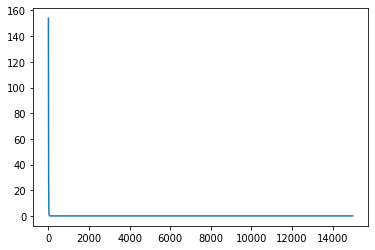

In [14]:
#Plot answer
plt.plot(loss_array)

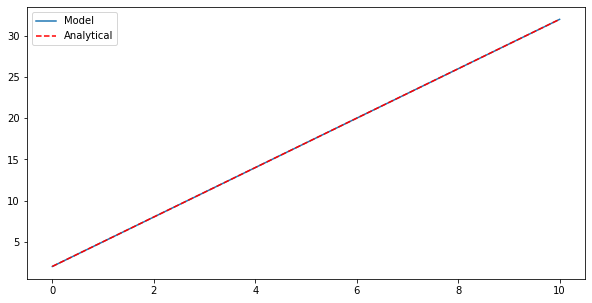

In [15]:
plt.figure(figsize=(10,5))
x = np.linspace(0,10,n).reshape(-1,1)
plt.plot(x,modelo(x), label = 'Model')
plt.plot(x,3*x+2, '--r',label = 'Analytical')
plt.legend()
plt.show()